# Amazon Reviews

In [1]:
# Lets use the custom function to load all the data with autoreload option

%load_ext autoreload
%autoreload 2

import custom_function as fn

In [2]:
# load imports
import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option("display.max_columns",50)
pd.set_option('display.max_colwidth', 250)

In [3]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [4]:
df = pd.read_csv("Data/Reviews.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      5003 non-null   int64  
 1   ProductId               5003 non-null   object 
 2   UserId                  5003 non-null   object 
 3   ProfileName             5003 non-null   object 
 4   HelpfulnessNumerator    5003 non-null   int64  
 5   HelpfulnessDenominator  5003 non-null   int64  
 6   Score                   5001 non-null   float64
 7   Time                    5003 non-null   int64  
 8   Summary                 5002 non-null   object 
 9   Text                    5003 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 391.0+ KB


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product b...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4.0,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heav..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5.0,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [5]:
df1 = df.isna().sum()



In [6]:
df1

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     2
Time                      0
Summary                   1
Text                      0
dtype: int64

In [7]:
df.dropna(inplace =True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5002
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      5000 non-null   int64  
 1   ProductId               5000 non-null   object 
 2   UserId                  5000 non-null   object 
 3   ProfileName             5000 non-null   object 
 4   HelpfulnessNumerator    5000 non-null   int64  
 5   HelpfulnessDenominator  5000 non-null   int64  
 6   Score                   5000 non-null   float64
 7   Time                    5000 non-null   int64  
 8   Summary                 5000 non-null   object 
 9   Text                    5000 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 429.7+ KB


In [10]:
import matplotlib.pyplot as plt

ratings = df['Score'].value_counts()



In [11]:
ratings

5.0    3134
4.0     711
1.0     470
3.0     395
2.0     290
Name: Score, dtype: int64

In [12]:

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
# numbers = ratings.index.to_numpy()
# quantity = ratings.to_numpy()

numbers, quantity = zip(*ratings.items())

In [13]:
numbers

(5.0, 4.0, 1.0, 3.0, 2.0)

In [14]:
quantity

(3134, 711, 470, 395, 290)

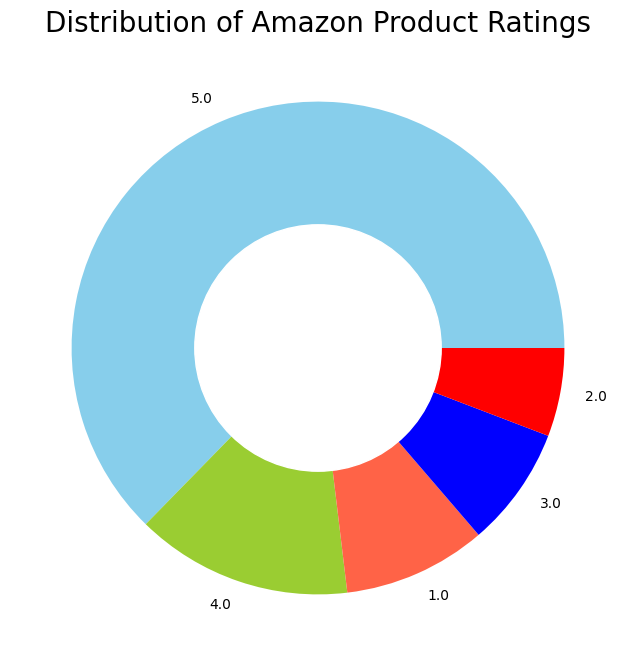

In [15]:
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()
#--- Inspect data ---

In [16]:
# #Uncommented the below code and run once. After the code is excecuted, please commented the below code
# import nltk
# nltk.download('vader_lexicon')

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
#--- WRITE YOUR CODE FOR TASK 4 ---

# sentiment_scores = df['Text'].apply(lambda x: sentiments.polarity_scores(x))
# #df[['Positive', 'Negative', 'Neutral']] = sentiment_scores.tolist()


# df[['Positive', 'Negative', 'Neutral']] = df['Text'].apply(lambda x: sentiments.polarity_scores(x).values())


# #--- Inspect data ---


df['Positive'] = df['Text'].apply(lambda x: sentiments.polarity_scores(x)['pos'])
df['Negative'] = df['Text'].apply(lambda x: sentiments.polarity_scores(x)['neg'])
df['Neutral'] = df['Text'].apply(lambda x: sentiments.polarity_scores(x)['neu'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5002
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      5000 non-null   int64  
 1   ProductId               5000 non-null   object 
 2   UserId                  5000 non-null   object 
 3   ProfileName             5000 non-null   object 
 4   HelpfulnessNumerator    5000 non-null   int64  
 5   HelpfulnessDenominator  5000 non-null   int64  
 6   Score                   5000 non-null   float64
 7   Time                    5000 non-null   int64  
 8   Summary                 5000 non-null   object 
 9   Text                    5000 non-null   object 
 10  Positive                5000 non-null   float64
 11  Negative                5000 non-null   float64
 12  Neutral                 5000 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 546.9+ KB


In [24]:
x = df['Positive'].sum()
y = df['Negative'].sum()
z = df['Neutral'].sum()

In [25]:
# Determine sentiment
if x > y and x > z:
  sentiment = "Positive"
elif y > x and y > z:
  sentiment = "Negative"
else:
  sentiment = "Neutral"

# Print the sentiment
print(f"The overall sentiment is: {sentiment}")

The overall sentiment is: Neutral
